<a href="https://colab.research.google.com/github/Mhtag/time_series_tutorial/blob/main/Python_Time_Series_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
coindeskURL = 'https://api.coindesk.com/v1/bpi/historical/close.json?'

start = datetime.date(2018, 1 ,1)
end = datetime.date(2021, 10, 2)

url = f'{coindeskURL}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'

result = requests.get(url)
result.content

b'{"bpi":{"2018-01-01":13412.44,"2018-01-02":14740.7563,"2018-01-03":15134.6513,"2018-01-04":15155.2263,"2018-01-05":16937.1738,"2018-01-06":17135.8363,"2018-01-07":16178.495,"2018-01-08":14970.3575,"2018-01-09":14439.4738,"2018-01-10":14890.7225,"2018-01-11":13287.26,"2018-01-12":13812.715,"2018-01-13":14188.785,"2018-01-14":13619.0288,"2018-01-15":13585.9013,"2018-01-16":11348.02,"2018-01-17":11141.2488,"2018-01-18":11250.6475,"2018-01-19":11514.925,"2018-01-20":12759.6413,"2018-01-21":11522.8588,"2018-01-22":10772.15,"2018-01-23":10839.8263,"2018-01-24":11399.52,"2018-01-25":11137.2375,"2018-01-26":11090.0638,"2018-01-27":11407.1538,"2018-01-28":11694.4675,"2018-01-29":11158.3938,"2018-01-30":10034.9975,"2018-01-31":10166.5063,"2018-02-01":9052.5763,"2018-02-02":8827.63,"2018-02-03":9224.3913,"2018-02-04":8186.6488,"2018-02-05":6914.26,"2018-02-06":7700.3863,"2018-02-07":7581.8038,"2018-02-08":8237.2363,"2018-02-09":8689.8388,"2018-02-10":8556.6125,"2018-02-11":8070.7963,"2018-02-12

In [ ]:
data = pd.read_json(result.content)
data

,bpi,disclaimer,time
2018-01-01,13412.4400,This data was produced from the CoinDesk Bitco...,NaN
2018-01-02,14740.7563,This data was produced from the CoinDesk Bitco...,NaN
2018-01-03,15134.6513,This data was produced from the CoinDesk Bitco...,NaN
2018-01-04,15155.2263,This data was produced from the CoinDesk Bitco...,NaN
2018-01-05,16937.1738,This data was produced from the CoinDesk Bitco...,NaN
...,...,...,...
2021-09-29,41535.1250,This data was produced from the CoinDesk Bitco...,NaN
2021-09-30,43825.5417,This data was produced from the CoinDesk Bitco...,NaN
2021-10-01,48162.7067,This data was produced from the CoinDesk Bitco...,NaN
updated,NaN,This data was produced from the CoinDesk Bitco...,"Oct 2, 2021 07:48:31 UTC"


In [ ]:
data = data[['bpi']]
data = data.iloc[:-2]
data.index = pd.to_datetime(data.index)
data


,bpi
2018-01-01,13412.4400
2018-01-02,14740.7563
2018-01-03,15134.6513
2018-01-04,15155.2263
2018-01-05,16937.1738
...,...
2021-09-27,42178.0300
2021-09-28,41046.4417
2021-09-29,41535.1250
2021-09-30,43825.5417


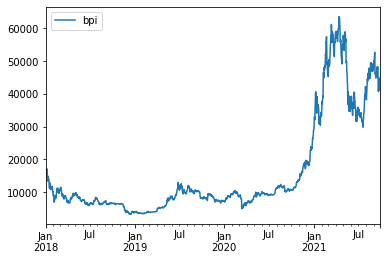

In [ ]:
data.plot()

# Resample


D Calendar day

B Business day

W Weekly

M Month

Q Quarter

A Year end

H Hours

T Minutes

S Seconds

In [ ]:
data.resample('Q').mean()

,bpi
2018-03-31,10468.423818
2018-06-30,7747.165877
2018-09-30,6798.307918
2018-12-31,5169.904503
2019-03-31,3781.639959
2019-06-30,7295.205002
2019-09-30,10369.583753
2019-12-31,7994.267917
2020-03-31,8273.003262
2020-06-30,8649.343719


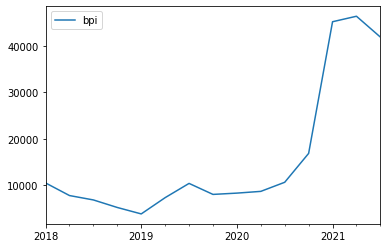

In [ ]:
data.resample('Q').mean().plot()

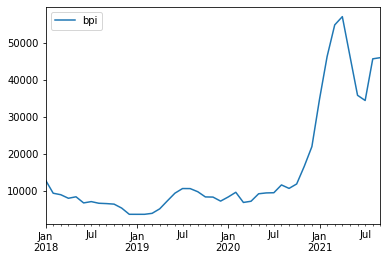

In [ ]:
data.resample('M').mean().plot()

## Detrend the data

In [ ]:
data[:10]

,bpi
2018-01-01,13412.4400
2018-01-02,14740.7563
2018-01-03,15134.6513
2018-01-04,15155.2263
2018-01-05,16937.1738
2018-01-06,17135.8363
2018-01-07,16178.4950
2018-01-08,14970.3575
2018-01-09,14439.4738
2018-01-10,14890.7225


In [ ]:
data[:10].diff()

,bpi
2018-01-01,NaN
2018-01-02,1328.3163
2018-01-03,393.8950
2018-01-04,20.5750
2018-01-05,1781.9475
2018-01-06,198.6625
2018-01-07,-957.3413
2018-01-08,-1208.1375
2018-01-09,-530.8837
2018-01-10,451.2487


In [ ]:
df = data.copy()
my_df = data.copy()

In [ ]:
data['diff_1'] = data['bpi'].diff()
data

,bpi,diff_1
2018-01-01,13412.4400,NaN
2018-01-02,14740.7563,1328.3163
2018-01-03,15134.6513,393.8950
2018-01-04,15155.2263,20.5750
2018-01-05,16937.1738,1781.9475
...,...,...
2021-09-25,42709.5933,-142.1084
2021-09-26,43199.4867,489.8934
2021-09-27,42178.0300,-1021.4567
2021-09-28,41046.4417,-1131.5883


In [ ]:
data['diff_2'] = data['bpi'].diff(2)
data

,bpi,diff_1,diff_2
2018-01-01,13412.4400,NaN,NaN
2018-01-02,14740.7563,1328.3163,NaN
2018-01-03,15134.6513,393.8950,1722.2113
2018-01-04,15155.2263,20.5750,414.4700
2018-01-05,16937.1738,1781.9475,1802.5225
...,...,...,...
2021-09-25,42709.5933,-142.1084,-2183.9900
2021-09-26,43199.4867,489.8934,347.7850
2021-09-27,42178.0300,-1021.4567,-531.5633
2021-09-28,41046.4417,-1131.5883,-2153.0450


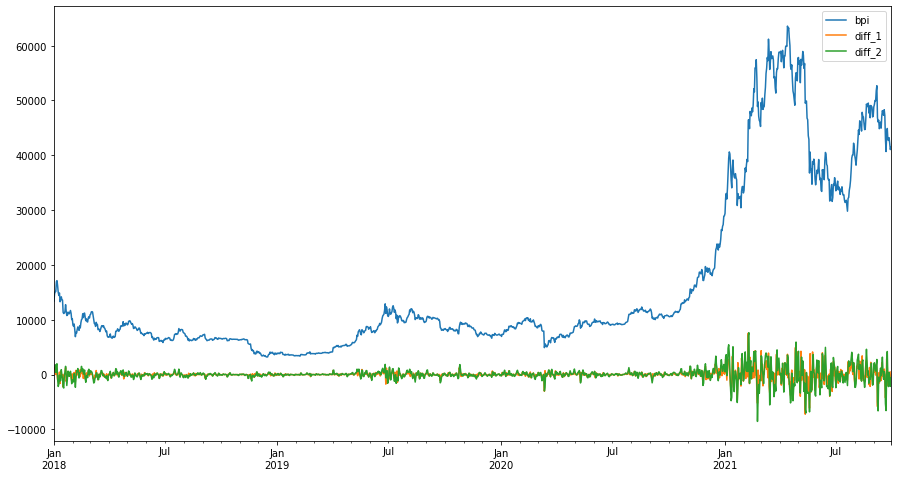

In [ ]:
data.plot(figsize=(15,8))

In [ ]:
# Shift function

In [ ]:
df[:5]

,bpi
2018-01-01,13412.4400
2018-01-02,14740.7563
2018-01-03,15134.6513
2018-01-04,15155.2263
2018-01-05,16937.1738


In [ ]:
df[:5].shift()

,bpi
2018-01-01,NaN
2018-01-02,13412.4400
2018-01-03,14740.7563
2018-01-04,15134.6513
2018-01-05,15155.2263


# Time shift

In [ ]:
df[:5].tshift()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  """Entry point for launching an IPython kernel.


,bpi
2018-01-02,13412.4400
2018-01-03,14740.7563
2018-01-04,15134.6513
2018-01-05,15155.2263
2018-01-06,16937.1738


In [ ]:
df[:5] - df[:5].shift()

,bpi
2018-01-01,NaN
2018-01-02,1328.3163
2018-01-03,393.8950
2018-01-04,20.5750
2018-01-05,1781.9475


In [ ]:
df

,bpi
2018-01-01,13412.4400
2018-01-02,14740.7563
2018-01-03,15134.6513
2018-01-04,15155.2263
2018-01-05,16937.1738
...,...
2021-09-27,42178.0300
2021-09-28,41046.4417
2021-09-29,41535.1250
2021-09-30,43825.5417


In [ ]:
df['shift'] = df-df.shift()
df

,bpi,shift
2018-01-01,13412.4400,NaN
2018-01-02,14740.7563,1328.3163
2018-01-03,15134.6513,393.8950
2018-01-04,15155.2263,20.5750
2018-01-05,16937.1738,1781.9475
...,...,...
2021-09-27,42178.0300,-1021.4567
2021-09-28,41046.4417,-1131.5883
2021-09-29,41535.1250,488.6833
2021-09-30,43825.5417,2290.4167


In [ ]:
df['tshift'] = df['bpi'].tshift(365)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  """Entry point for launching an IPython kernel.


,bpi,shift,tshift
2018-01-01,13412.4400,NaN,NaN
2018-01-02,14740.7563,1328.3163,NaN
2018-01-03,15134.6513,393.8950,NaN
2018-01-04,15155.2263,20.5750,NaN
2018-01-05,16937.1738,1781.9475,NaN
...,...,...,...
2021-09-27,42178.0300,-1021.4567,10752.3455
2021-09-28,41046.4417,-1131.5883,10863.0657
2021-09-29,41535.1250,488.6833,10764.2844
2021-09-30,43825.5417,2290.4167,10741.5796


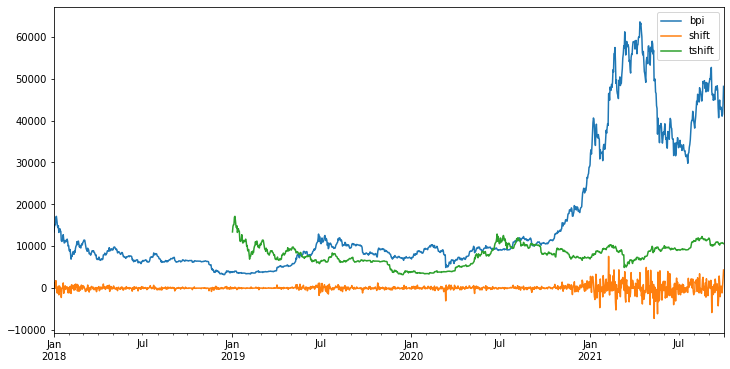

In [ ]:
df.plot(figsize=(12,6))

# Group the data by month, weekdays etc

In [ ]:
my_df.head()

,bpi
2018-01-01,13412.4400
2018-01-02,14740.7563
2018-01-03,15134.6513
2018-01-04,15155.2263
2018-01-05,16937.1738


In [ ]:
my_df.groupby(my_df.index.dayofweek).mean()

,bpi
0,15815.176657
1,15791.387080
2,15858.555013
3,15859.028630
4,15981.511912
5,15853.463584
6,15831.103444


In [ ]:
my_df.groupby(my_df.index.month).mean()

,bpi
1,14935.787295
2,17192.734935
3,18673.922266
4,19376.782277
5,17858.472390
6,15370.737087
7,15435.176208
8,18660.482582
9,18255.031792
10,9325.092989


In [ ]:
my_df.groupby(my_df.index.year).mean()

,bpi
2018,7529.385702
2019,7379.960562
2020,11110.755804
2021,44576.466354


In [ ]:
my_df.groupby(my_df.index.day).mean()

,bpi
1,16133.202326
2,15611.317216
3,15785.642591
4,15532.651698
5,15823.717287
6,15964.239096
7,15866.113151
8,16078.928996
9,16282.441949
10,16044.061576


## Percent Change

In [ ]:
my_df.pct_change()

,bpi
2018-01-01,NaN
2018-01-02,0.099036
2018-01-03,0.026721
2018-01-04,0.001359
2018-01-05,0.117580
...,...
2021-09-27,-0.023645
2021-09-28,-0.026829
2021-09-29,0.011906
2021-09-30,0.055144


## Cumulitive sum

In [ ]:
my_df[:10].cumsum()

,bpi
2018-01-01,13412.4400
2018-01-02,28153.1963
2018-01-03,43287.8476
2018-01-04,58443.0739
2018-01-05,75380.2477
2018-01-06,92516.0840
2018-01-07,108694.5790
2018-01-08,123664.9365
2018-01-09,138104.4103
2018-01-10,152995.1328


## Mean over each time

In [ ]:
my_df[:10].expanding().mean()

,bpi
2018-01-01,13412.440000
2018-01-02,14076.598150
2018-01-03,14429.282533
2018-01-04,14610.768475
2018-01-05,15076.049540
2018-01-06,15419.347333
2018-01-07,15527.797000
2018-01-08,15458.117062
2018-01-09,15344.934478
2018-01-10,15299.513280


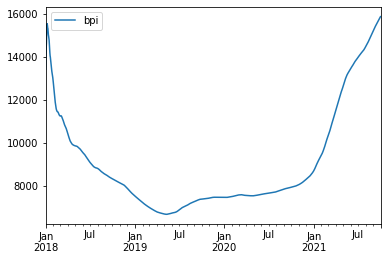

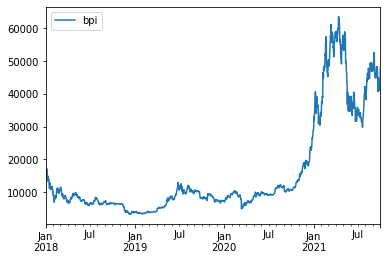

In [ ]:
my_df.expanding().mean().plot()
my_df.plot()